In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Missing value handling**

In this step I will check for exist of missing value.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From the Non-Null Count in the table we can see that there are 207 null value in total_bedrooms. We can remove those rows with null value for better prediction.

In [6]:
df = data.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


As the data type of ocean_proximity is object, I will proceed to encode it to numeric data type.

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['ocean_proximity']


In [10]:
from sklearn.preprocessing import LabelEncoder

label_df = df.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_df[col] = label_encoder.fit_transform(label_df[col])
    print(f"Column: {col}")
    print("Original values:", label_encoder.classes_)
    print("Encoded values:", label_encoder.transform(label_encoder.classes_))
    print()

label_df.head()

Column: ocean_proximity
Original values: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Encoded values: [0 1 2 3 4]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [11]:
label_df.ocean_proximity.value_counts()

0    9034
1    6496
4    2628
3    2270
2       5
Name: ocean_proximity, dtype: int64

Ocean_proximity had been change to numeric data by using label encoding.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

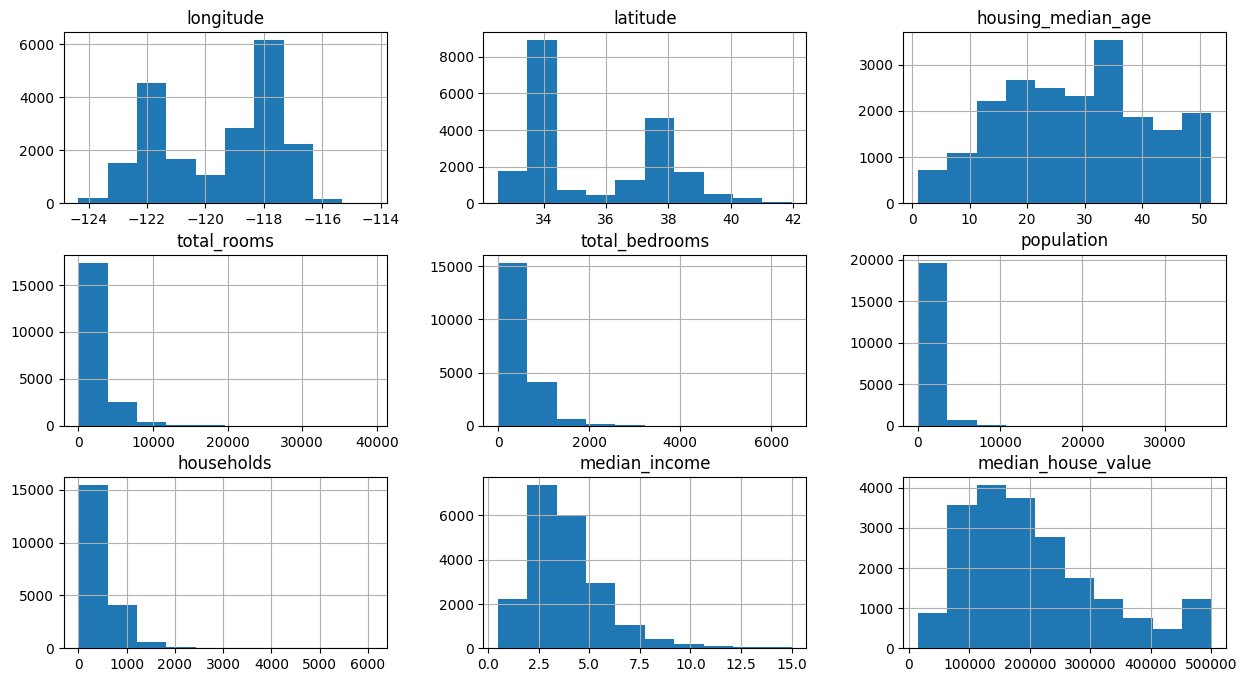

In [12]:
df.hist(figsize = (15,8))

<Axes: >

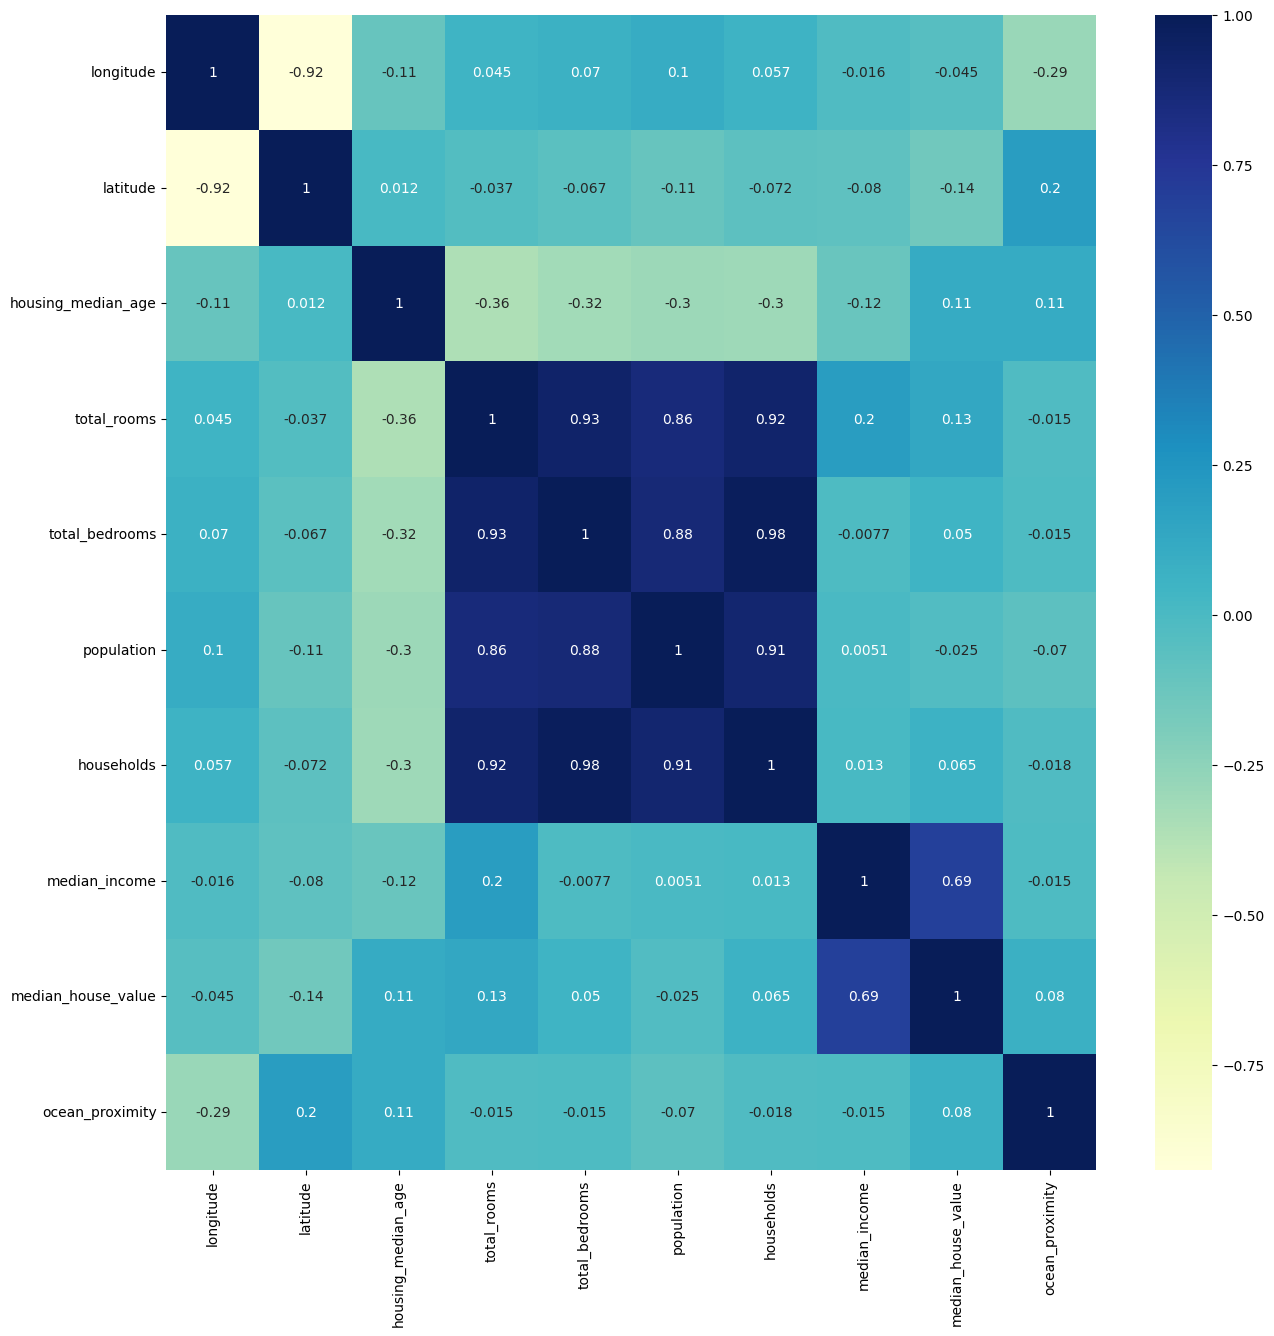

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(label_df.corr(), annot = True, cmap = 'YlGnBu')

In [14]:
X = label_df.drop('median_house_value', axis = 1)
y = label_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

I splitted the dataset into train and test by using tran_test_split importted from sklearn.model_selection.

The independent data were also standardized by using StandardScaler. The reason of standardization was to scale the data for better sensitive to the prediction algorithms. It could improve the accuracy of the prediction.

In [15]:
print(X_train.shape)
print(X_test.shape)

(16346, 9)
(4087, 9)


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.6289833269176128

In [17]:
print('Coefficient :', lr.coef_)

Coefficient : [-8.51356123e+04 -9.06922764e+04  1.45490434e+04 -1.70132941e+04
  4.33184117e+04 -4.47952003e+04  2.31862124e+04  7.63351345e+04
 -1.71776420e+01]


In [18]:
print('Coefficient :', lr.coef_)

Coefficient : [-8.51356123e+04 -9.06922764e+04  1.45490434e+04 -1.70132941e+04
  4.33184117e+04 -4.47952003e+04  2.31862124e+04  7.63351345e+04
 -1.71776420e+01]


In [19]:
pd.DataFrame(lr.coef_,label_df.columns[:-1],columns=['coeficients'])

,coeficients
longitude,-85135.612303
latitude,-90692.276355
housing_median_age,14549.043435
total_rooms,-17013.294130
total_bedrooms,43318.411725
population,-44795.200294
households,23186.212432
median_income,76335.134497
median_house_value,-17.177642


In [20]:
y_pred = lr.predict(X_test)

In [21]:
df_1 = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

In [22]:
df_1.head()

,y_test,y_pred
15740,112500.0,142356.490863
20629,108300.0,2493.146597
15815,490000.0,228772.531593
3861,328500.0,256166.814726
4568,87500.0,159027.139150


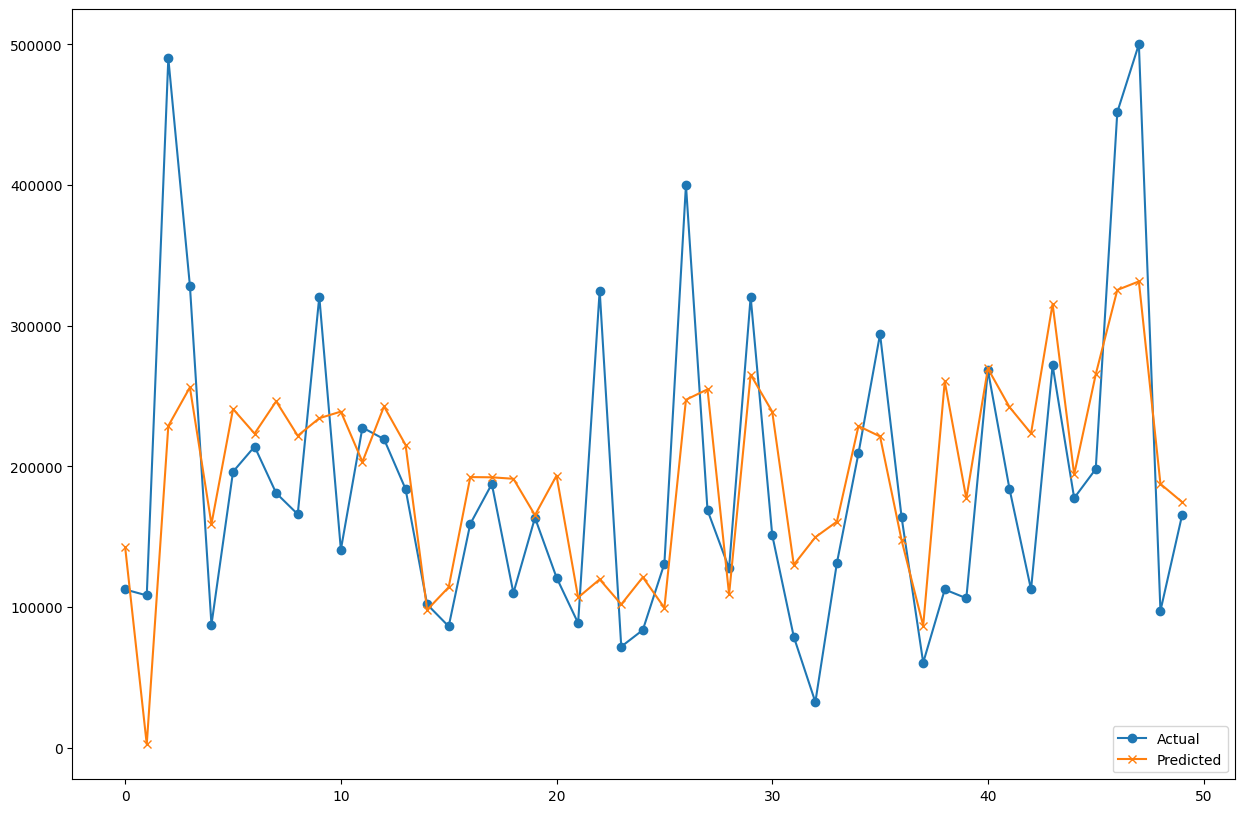

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(range(50), df_1[:50]['y_test'], marker='o', label='Actual')
plt.plot(range(50), df_1[:50]['y_pred'], marker='x', label='Predicted')
plt.legend()
plt.show()

In [24]:
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_pred - y_test) ** 2))

print('Variance score: %.2f' % lr.score(X_test, y_test))

Mean Squared Error (MSE) : 4900089834.34
Variance score: 0.63


**Ridge Model**

In [25]:
ridge = linear_model.Ridge(alpha=0.8)
ridge.fit(X_train,y_train)

Ridge(alpha=0.8)

In [26]:
ridge.score(X_test,y_test)

0.6289800222656474

In [27]:
ridge.coef_

array([-8.50655253e+04, -9.06240147e+04,  1.45550317e+04, -1.69977944e+04,
        4.32584300e+04, -4.47828302e+04,  2.32211443e+04,  7.63347537e+04,
       -1.04320151e+01])

In [28]:
pd.DataFrame(ridge.coef_,label_df.columns[:-1],columns=['coeficients'])

,coeficients
longitude,-85065.525347
latitude,-90624.014690
housing_median_age,14555.031684
total_rooms,-16997.794356
total_bedrooms,43258.429959
population,-44782.830217
households,23221.144273
median_income,76334.753744
median_house_value,-10.432015


In [29]:
y_pred2 = ridge.predict(X_test)

In [30]:
df_2 = pd.DataFrame({'y_test':y_test,'y_pred':y_pred2})

In [31]:
df_2.head()

,y_test,y_pred
15740,112500.0,142312.720040
20629,108300.0,2586.579043
15815,490000.0,228759.479886
3861,328500.0,256155.559989
4568,87500.0,159008.611345


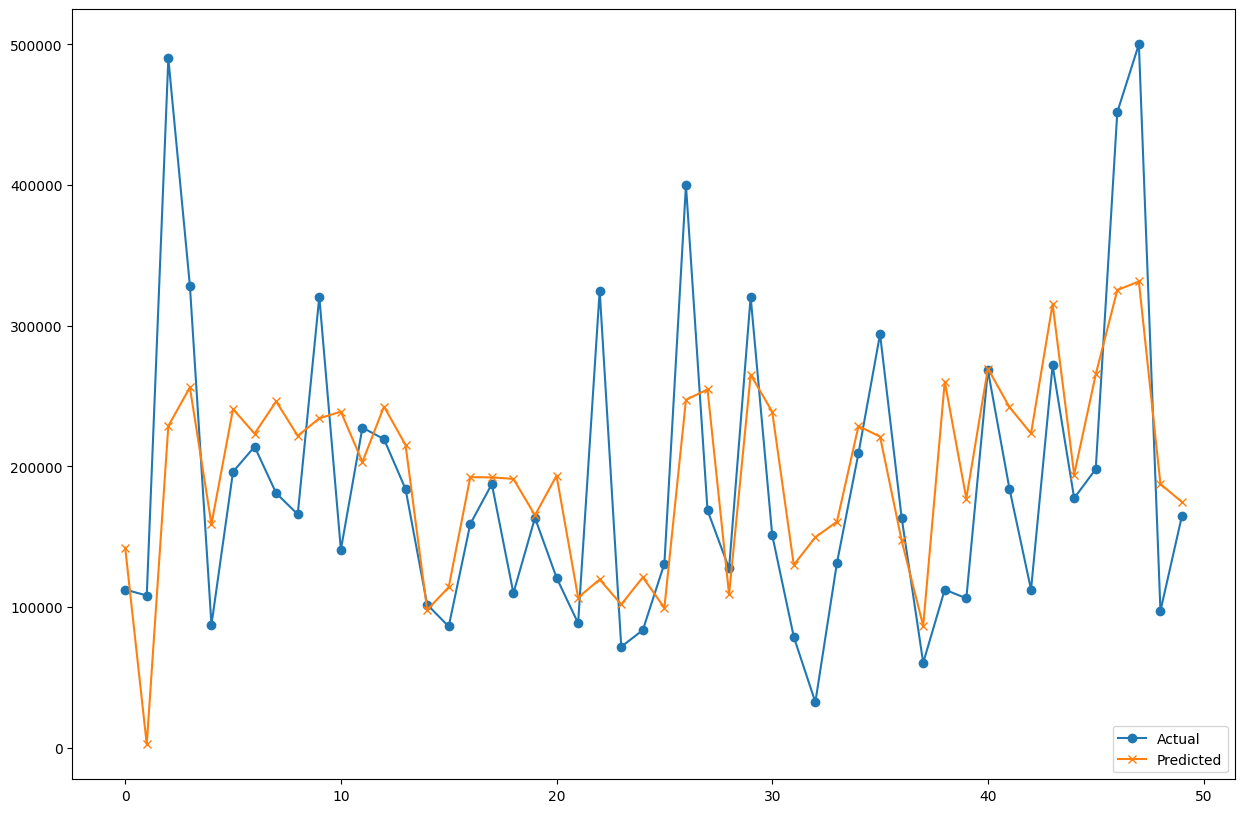

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(range(50), df_2[:50]['y_test'], marker='o', label='Actual')
plt.plot(range(50), df_2[:50]['y_pred'], marker='x', label='Predicted')
plt.legend()
plt.show()

In [33]:
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_pred2 - y_test) ** 2))

print('Variance score: %.2f' % lr.score(X_test, y_test))

Mean Squared Error (MSE) : 4900133479.52
Variance score: 0.63
